<a href="https://colab.research.google.com/github/arch492/Hello-node/blob/main/ML_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder()
sc = StandardScaler()
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet


#**Loading the dataset**





In [4]:
df = pd.read_csv("/content/habitability_score_of houses.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,...,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Crime_Rate_equivalent,Water_Supply_equivalent,Dust_and_Noise_equivalent,Furnishing_equivalent,Property_Type_equivalent,Power_Backup_equivalent,Habitability_score
0,0,0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,...,Medium,152.0,2.52,10,2.0,20,3.0,2,0,29.990000
1,1,1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,...,Medium,92.0,4.16,50,2.0,20,2.0,2,0,81.475791
2,2,2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,...,Medium,90.0,2.92,20,1.0,20,2.0,1,0,65.695507
3,3,3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,...,Medium,158.0,3.45,40,1.0,20,2.0,2,0,73.161176
4,4,4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,...,High,186.0,2.72,10,1.0,30,1.0,6,0,75.923493


In [5]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,...,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Crime_Rate_equivalent,Water_Supply_equivalent,Dust_and_Noise_equivalent,Furnishing_equivalent,Property_Type_equivalent,Power_Backup_equivalent,Habitability_score
10495,10495,10495,0x423d,Apartment,961,NaN,3,Unfurnished,0.0,No,...,Medium,94.0,3.55,40,2.0,20,3.0,2,0,63.235556
10496,10496,10496,0x78c5,Container Home,282,1.0,2,Semi_Furnished,3.0,Yes,...,Medium,106.0,2.90,50,1.0,20,2.0,1,1,77.627679
10497,10497,10497,0xbf3,Duplex,27445,NaN,2,Fully Furnished,0.0,No,...,High,149.0,4.02,50,2.0,30,1.0,5,0,78.924509
10498,10498,10498,0x305b,Single-family home,1451,2.0,3,Unfurnished,1.0,Yes,...,Medium,131.0,3.49,50,2.0,20,3.0,4,1,78.634706
10499,10499,10499,0x5cff,Apartment,578,NaN,1,Semi_Furnished,0.0,No,...,Medium,112.0,4.15,40,1.0,20,2.0,2,0,81.370531


#**Identifying the null values and datatypes of the attributes**


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10500 non-null  int64  
 1   Unnamed: 0.1               10500 non-null  int64  
 2   Property_ID                10500 non-null  object 
 3   Property_Type              10500 non-null  object 
 4   Property_Area              10500 non-null  int64  
 5   Number_of_Windows          10055 non-null  float64
 6   Number_of_Doors            10500 non-null  int64  
 7   Furnishing                 10243 non-null  object 
 8   Frequency_of_Powercuts     10134 non-null  float64
 9   Power_Backup               10500 non-null  object 
 10  Water_Supply               10500 non-null  object 
 11  Traffic_Density_Score      10500 non-null  float64
 12  Crime_Rate                 10288 non-null  object 
 13  Dust_and_Noise             10170 non-null  obj

In [7]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)


In [8]:
df.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,...,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Crime_Rate_equivalent,Water_Supply_equivalent,Dust_and_Noise_equivalent,Furnishing_equivalent,Property_Type_equivalent,Power_Backup_equivalent,Habitability_score
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,...,Medium,152.0,2.52,10,2.0,20,3.0,2,0,29.990000
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,...,Medium,92.0,4.16,50,2.0,20,2.0,2,0,81.475791
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,...,Medium,90.0,2.92,20,1.0,20,2.0,1,0,65.695507
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,...,Medium,158.0,3.45,40,1.0,20,2.0,2,0,73.161176
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,...,High,186.0,2.72,10,1.0,30,1.0,6,0,75.923493


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                10500 non-null  object 
 1   Property_Type              10500 non-null  object 
 2   Property_Area              10500 non-null  int64  
 3   Number_of_Windows          10055 non-null  float64
 4   Number_of_Doors            10500 non-null  int64  
 5   Furnishing                 10243 non-null  object 
 6   Frequency_of_Powercuts     10134 non-null  float64
 7   Power_Backup               10500 non-null  object 
 8   Water_Supply               10500 non-null  object 
 9   Traffic_Density_Score      10500 non-null  float64
 10  Crime_Rate                 10288 non-null  object 
 11  Dust_and_Noise             10170 non-null  object 
 12  Air_Quality_Index          10500 non-null  float64
 13  Neighborhood_Review        10500 non-null  flo

In [10]:
df.drop(df.iloc[:,14:20],axis=1,inplace=True)

In [11]:
print(df.isnull().sum())

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
Habitability_score          0
dtype: int64


#Filling Missing values using KNN
KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data.

The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.

In [12]:
impute = SimpleImputer(strategy = "most_frequent")
knnimputer = KNNImputer(n_neighbors=25)

In [13]:
df2 = df.iloc[:,[3,6]]
df2

,Number_of_Windows,Frequency_of_Powercuts
0,3.0,0.0
1,4.0,0.0
2,1.0,1.0
3,2.0,1.0
4,12.0,0.0
...,...,...
10495,NaN,0.0
10496,1.0,3.0
10497,NaN,0.0
10498,2.0,1.0


In [14]:
df2=knnimputer.fit_transform(df2)
df2=pd.DataFrame(df2)
df2.columns=["Number_of_Windows","Frequency_of_Powercuts"]
df2

,Number_of_Windows,Frequency_of_Powercuts
0,3.00,0.0
1,4.00,0.0
2,1.00,1.0
3,2.00,1.0
4,12.00,0.0
...,...,...
10495,4.16,0.0
10496,1.00,3.0
10497,4.16,0.0
10498,2.00,1.0


In [15]:
df3 = df.iloc[:,[5,10,11]]
df3


,Furnishing,Crime_Rate,Dust_and_Noise
0,Unfurnished,Well above average,Medium
1,Semi_Furnished,Well below average,Medium
2,Semi_Furnished,Slightly above average,Medium
3,Semi_Furnished,Slightly below average,Medium
4,Fully Furnished,Well above average,High
...,...,...,...
10495,Unfurnished,Slightly below average,Medium
10496,Semi_Furnished,Well below average,Medium
10497,Fully Furnished,Well below average,High
10498,Unfurnished,Well below average,Medium


In [16]:
df3 = impute.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3.columns=['Furnishing','Crime_Rate', 'Dust_and_Noise']
df3

,Furnishing,Crime_Rate,Dust_and_Noise
0,Unfurnished,Well above average,Medium
1,Semi_Furnished,Well below average,Medium
2,Semi_Furnished,Slightly above average,Medium
3,Semi_Furnished,Slightly below average,Medium
4,Fully Furnished,Well above average,High
...,...,...,...
10495,Unfurnished,Slightly below average,Medium
10496,Semi_Furnished,Well below average,Medium
10497,Fully Furnished,Well below average,High
10498,Unfurnished,Well below average,Medium


In [17]:
df.Number_of_Windows = df2.Number_of_Windows
df.Frequency_of_Powercuts = df2.Frequency_of_Powercuts
df.Furnishing	 = df3.Furnishing	
df.Crime_Rate = df3.Crime_Rate
df.Dust_and_Noise = df3.Dust_and_Noise

In [18]:
df['Number_of_Windows'] = df['Number_of_Windows'].astype(float)
df['Number_of_Doors'] = df['Number_of_Doors'].astype(float)
df['Frequency_of_Powercuts'] = df['Frequency_of_Powercuts'].astype(float)


In [19]:
df

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x6e93,Apartment,293,3.00,1.0,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52,29.990000
1,0x8787,Apartment,586,4.00,1.0,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16,81.475791
2,0x6c17,Container Home,305,1.00,2.0,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92,65.695507
3,0x9dbd,Apartment,258,2.00,1.0,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45,73.161176
4,0xbfde,Bungalow,3031,12.00,4.0,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72,75.923493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0x423d,Apartment,961,4.16,3.0,Unfurnished,0.0,No,Once in a day - Evening,5.44,Slightly below average,Medium,94.0,3.55,63.235556
10496,0x78c5,Container Home,282,1.00,2.0,Semi_Furnished,3.0,Yes,All time,6.72,Well below average,Medium,106.0,2.90,77.627679
10497,0xbf3,Duplex,27445,4.16,2.0,Fully Furnished,0.0,No,Once in a day - Evening,9.28,Well below average,High,149.0,4.02,78.924509
10498,0x305b,Single-family home,1451,2.00,3.0,Unfurnished,1.0,Yes,Once in a day - Evening,6.25,Well below average,Medium,131.0,3.49,78.634706


[]

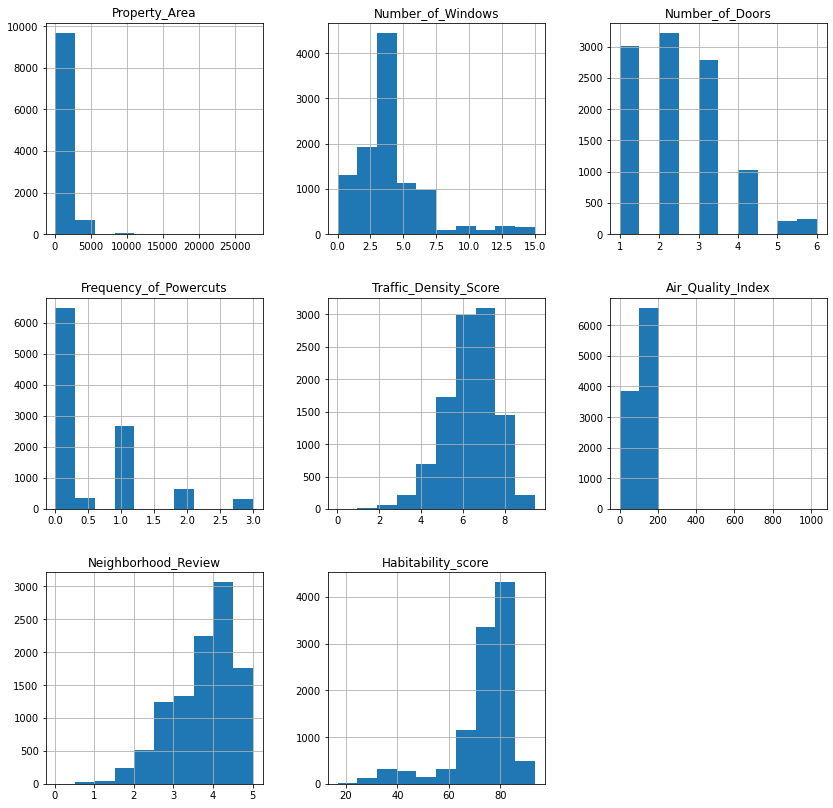

In [20]:
df.hist(figsize=(14,14))
plt.plot()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             10500 non-null  object 
 1   Property_Type           10500 non-null  object 
 2   Property_Area           10500 non-null  int64  
 3   Number_of_Windows       10500 non-null  float64
 4   Number_of_Doors         10500 non-null  float64
 5   Furnishing              10500 non-null  object 
 6   Frequency_of_Powercuts  10500 non-null  float64
 7   Power_Backup            10500 non-null  object 
 8   Water_Supply            10500 non-null  object 
 9   Traffic_Density_Score   10500 non-null  float64
 10  Crime_Rate              10500 non-null  object 
 11  Dust_and_Noise          10500 non-null  object 
 12  Air_Quality_Index       10500 non-null  float64
 13  Neighborhood_Review     10500 non-null  float64
 14  Habitability_score      10500 non-null

**Selecting best features**

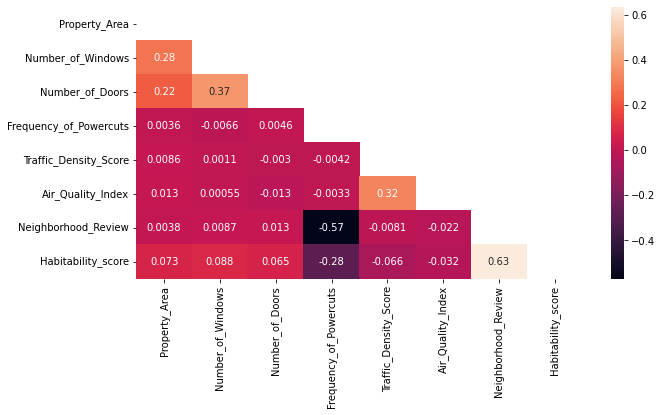

In [22]:
col=['Property_Area','Number_of_Windows','Number_of_Doors','Frequency_of_Powercuts','Traffic_Density_Score','Air_Quality_Index','Neighborhood_Review','Habitability_score']
fig,ax=plt.subplots(figsize=(10,5))
corr=df[col].corr()
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr,dtype=bool)))

**Habitability score is highly correlated to Neighbourhood Review and Frequency of Powercuts**


**Linear Regression considering the features with highest correlation**

In [23]:
y=df['Habitability_score']
X=df[['Neighborhood_Review','Frequency_of_Powercuts']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4161487216034043


In [24]:
df4 = df.iloc[:,[1,5,7,8,10,11]]
df4

,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,Apartment,Unfurnished,No,Once in a day - Morning,Well above average,Medium
1,Apartment,Semi_Furnished,No,Once in a day - Evening,Well below average,Medium
2,Container Home,Semi_Furnished,No,All time,Slightly above average,Medium
3,Apartment,Semi_Furnished,No,All time,Slightly below average,Medium
4,Bungalow,Fully Furnished,No,All time,Well above average,High
...,...,...,...,...,...,...
10495,Apartment,Unfurnished,No,Once in a day - Evening,Slightly below average,Medium
10496,Container Home,Semi_Furnished,Yes,All time,Well below average,Medium
10497,Duplex,Fully Furnished,No,Once in a day - Evening,Well below average,High
10498,Single-family home,Unfurnished,Yes,Once in a day - Evening,Well below average,Medium


In [25]:
df4 = ohe.fit_transform(df4)
df4 = pd.DataFrame(df4.toarray())
df4

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10497,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
df5 = df.iloc[:,[2,3,4,6,9,12,13,14]]
df5

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,293,3.00,1.0,0.0,7.28,152.0,2.52,29.990000
1,586,4.00,1.0,0.0,7.63,92.0,4.16,81.475791
2,305,1.00,2.0,1.0,5.39,90.0,2.92,65.695507
3,258,2.00,1.0,1.0,7.53,158.0,3.45,73.161176
4,3031,12.00,4.0,0.0,8.79,186.0,2.72,75.923493
...,...,...,...,...,...,...,...,...
10495,961,4.16,3.0,0.0,5.44,94.0,3.55,63.235556
10496,282,1.00,2.0,3.0,6.72,106.0,2.90,77.627679
10497,27445,4.16,2.0,0.0,9.28,149.0,4.02,78.924509
10498,1451,2.00,3.0,1.0,6.25,131.0,3.49,78.634706


In [27]:
df6 = pd.concat([df4,df5],axis=1)
df6

,0,1,2,3,4,5,6,7,8,9,...,22,23,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,293,3.00,1.0,0.0,7.28,152.0,2.52,29.990000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,586,4.00,1.0,0.0,7.63,92.0,4.16,81.475791
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,305,1.00,2.0,1.0,5.39,90.0,2.92,65.695507
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,258,2.00,1.0,1.0,7.53,158.0,3.45,73.161176
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3031,12.00,4.0,0.0,8.79,186.0,2.72,75.923493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,961,4.16,3.0,0.0,5.44,94.0,3.55,63.235556
10496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,282,1.00,2.0,3.0,6.72,106.0,2.90,77.627679
10497,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,27445,4.16,2.0,0.0,9.28,149.0,4.02,78.924509
10498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1451,2.00,3.0,1.0,6.25,131.0,3.49,78.634706


In [28]:
df6.columns=[a for a in range(0,len(df6.columns))]

In [29]:
X = df6.iloc[:, :-1]
y = df6.iloc[:, -1]
X

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,293,3.00,1.0,0.0,7.28,152.0,2.52
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,586,4.00,1.0,0.0,7.63,92.0,4.16
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,305,1.00,2.0,1.0,5.39,90.0,2.92
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,258,2.00,1.0,1.0,7.53,158.0,3.45
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3031,12.00,4.0,0.0,8.79,186.0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,961,4.16,3.0,0.0,5.44,94.0,3.55
10496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,282,1.00,2.0,3.0,6.72,106.0,2.90
10497,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,27445,4.16,2.0,0.0,9.28,149.0,4.02
10498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1451,2.00,3.0,1.0,6.25,131.0,3.49


In [30]:
y

0        29.990000
1        81.475791
2        65.695507
3        73.161176
4        75.923493
           ...    
10495    63.235556
10496    77.627679
10497    78.924509
10498    78.634706
10499    81.370531
Name: 31, Length: 10500, dtype: float64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False, stratify = None)

In [65]:
y_train

0       29.990000
1       81.475791
2       65.695507
3       73.161176
4       75.923493
          ...    
8395    88.987353
8396    82.885860
8397    65.600764
8398    83.187500
8399    82.762203
Name: 31, Length: 8400, dtype: float64

**Linear Regression after converting categorical data into numerical**

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Linear Regression accuracy score:",lr.score(X_test, y_test))


Linear Regression accuracy score: 0.7424268020855977


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mse

37.63087042659399

In [68]:
rmse=np.sqrt(mse)
rmse

6.134400575980834

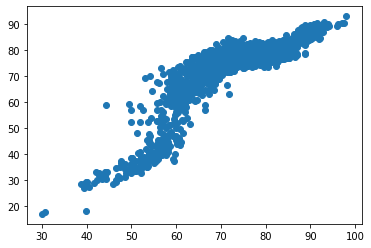

In [69]:
plt.scatter(y_pred,y_test)

**"Ridge Regression**

In [70]:
r = Ridge()
r.fit(X_train,y_train)
y_pred5 = r.predict(X_test)
print("Ridge Regression accuracy score:",r.score(X_test, y_test))

Ridge Regression accuracy score: 0.742424643965981


In [71]:
mse1 = mean_squared_error(y_test,y_pred5)
mse1

37.63118572306241

In [72]:
rmse1=np.sqrt(mse1)
rmse1

6.134426274971638

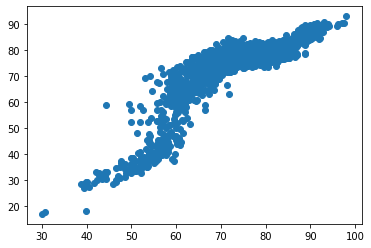

In [73]:
plt.scatter(y_pred5,y_test)

**Lasso Regression**

In [75]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred6 = lasso.predict(X_test)
print("Lasso Regression accuracy score:",lasso.score(X_test, y_test))

Lasso Regression accuracy score: 0.6063194232965383


In [77]:
mse2 = mean_squared_error(y_test,y_pred6)
mse2

57.51585526502639

In [78]:
rmse2=np.sqrt(mse1)
rmse2

6.134426274971638

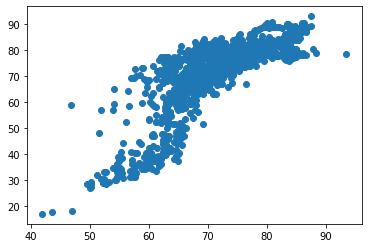

In [79]:
plt.scatter(y_pred6,y_test)

**Elastic Net**

In [80]:
en = ElasticNet()
en.fit(X_train,y_train)
y_pred7 = en.predict(X_test)
print("Elastic Net accuracy score:",en.score(X_test, y_test))

Elastic Net accuracy score: 0.4563610349884848


In [81]:
mse3 = mean_squared_error(y_test,y_pred7)
mse3

79.42444173867243

In [82]:
rmse3=np.sqrt(mse3)
rmse3

8.912039145934695

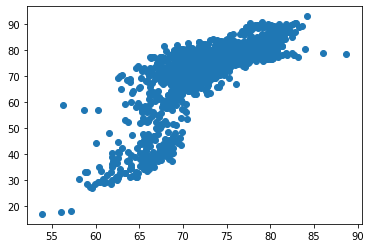

In [83]:
plt.scatter(y_pred7,y_test)

**Decision Tree**

In [84]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred2 = dtr.predict(X_test)
print("Decision Tree accuracy score:",dtr.score(X_test, y_test))

Decision Tree accuracy score: 0.9740622227498502


In [85]:
mse4 = mean_squared_error(y_test,y_pred2)
mse4

3.7894514753767643

In [86]:
rmse4=np.sqrt(mse4)
rmse4

1.9466513492088828

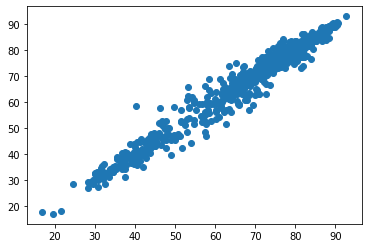

In [87]:
plt.scatter(y_pred2,y_test)

**Random Forest**

In [88]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred3 = rfr.predict(X_test)
print("Random Forest accuracy score:",rfr.score(X_test, y_test))

Random Forest accuracy score: 0.9852533149874294


In [89]:
mse5 = mean_squared_error(y_test,y_pred3)
mse5

2.154457829553588

In [90]:
rmse5=np.sqrt(mse5)
rmse5

1.467807149987214

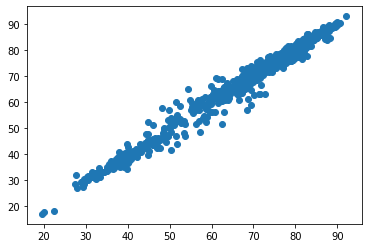

In [91]:
plt.scatter(y_pred3,y_test)

In [128]:
scores=[]
scores.append(lr.score(X_test, y_test))
scores.append(r.score(X_test, y_test))
scores.append(lasso.score(X_test, y_test))
scores.append(en.score(X_test, y_test))
scores.append(dtr.score(X_test, y_test))
scores.append(rfr.score(X_test, y_test))

models=['Linear','Ridge','Lasso','Elastic Net','Decision Tree','Random Forest']
summary = {'Regression Models': models,
        'Accuracy Scores': scores}
 
summarydf = pd.DataFrame(summary)
summarydf


,Regression Models,Accuracy Scores
0,Linear,0.742427
1,Ridge,0.742425
2,Lasso,0.606319
3,Elastic Net,0.456361
4,Decision Tree,0.974062
5,Random Forest,0.985253


**Best model for predicting the values: Random Forest Regressor**

In [92]:
y_pred3

array([79.26835177, 71.29774631, 82.55940415, ..., 78.43403089,
       78.87197877, 81.1690814 ])

In [114]:
y_pred3=list(y_pred3)

In [93]:
y_test

8400     80.765500
8401     72.181074
8402     81.792261
8403     78.360000
8404     77.840702
           ...    
10495    63.235556
10496    77.627679
10497    78.924509
10498    78.634706
10499    81.370531
Name: 31, Length: 2100, dtype: float64

In [110]:
l2=y_test.values.tolist()


In [112]:
dframe=pd.DataFrame({'Existing habitability scores':l2})
dframe


,Existing habitability scores
0,80.765500
1,72.181074
2,81.792261
3,78.360000
4,77.840702
...,...
2095,63.235556
2096,77.627679
2097,78.924509
2098,78.634706


In [113]:
property_id = list(df['Property_ID'])
property_id = property_id[8400:]
dframe.insert(loc = 0,
          column = 'Property_ID',
          value = property_id)
dframe

,Property_ID,Existing habitability scores
0,0x3a4f,80.765500
1,0x7bd7,72.181074
2,0x5db0,81.792261
3,0x3e55,78.360000
4,0x8981,77.840702
...,...,...
2095,0x423d,63.235556
2096,0x78c5,77.627679
2097,0xbf3,78.924509
2098,0x305b,78.634706


In [116]:
dframe.insert(loc = len(dframe.columns),
          column = 'Predicted Habitability scores',
          value = y_pred3)
dframe

,Property_ID,Existing habitability scores,Predicted Habitability scores
0,0x3a4f,80.765500,79.268352
1,0x7bd7,72.181074,71.297746
2,0x5db0,81.792261,82.559404
3,0x3e55,78.360000,77.979517
4,0x8981,77.840702,73.940886
...,...,...,...
2095,0x423d,63.235556,61.324216
2096,0x78c5,77.627679,77.168033
2097,0xbf3,78.924509,78.434031
2098,0x305b,78.634706,78.871979


In [119]:
maxValues = dframe.max()
print("Property with best habitability score:")
print(maxValues)

Property with best habitability score:
Property_ID                          0xfe3
Existing habitability scores        92.915
Predicted Habitability scores    92.177892
dtype: object


In [126]:
dframe.loc[dframe['Existing habitability scores'] == 92.915]

,Property_ID,Existing habitability scores,Predicted Habitability scores
1087,0x40e0,92.915,92.177892


In [127]:
df.loc[df['Property_ID'] == '0x40e0']

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
9487,0x40e0,Bungalow,4119,11.0,6.0,Fully Furnished,0.0,Yes,All time,7.97,Well below average,Medium,122.0,4.75,92.915


**Thus the property with property id 0x40e0 is the best place to live in**
